In [23]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
mnist = fetch_openml("mnist_784")

In [24]:
mnist.keys()
mnist['data'].shape
mnist['target'].shape


(70000,)

In [25]:
len(mnist['data'])

70000

In [26]:
np.max(mnist['data'][100])

255.0

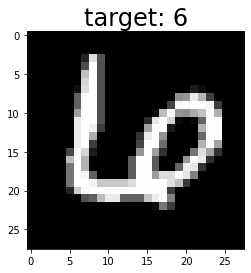

In [27]:
idx = np.random.randint(mnist['data'].shape[0])
idx
img = mnist['data'][idx,:].reshape(28,28)

plt.imshow(img, cmap='gray')
plt.title(f"target: {mnist['target'][idx]}", size=24)
plt.show()

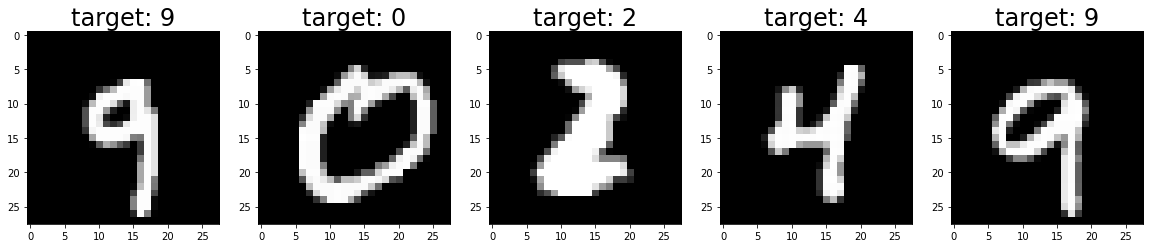

In [28]:
idx = np.random.randint(mnist['data'].shape[0]-5)
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(mnist['data'][idx:idx+5], mnist['target'][idx:idx+5])):
  plt.subplot(1,5, index + 1)
  plt.imshow(image.reshape(28,28), cmap='gray')
  plt.title(f"target: {label}", size=24)
  #plt.show()

In [56]:

from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist['data'], mnist['target'], test_size=0.2, random_state=0)

In [57]:
train_img[1], test_img[1]

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
model = LogisticRegression(solver='lbfgs',max_iter=500)

In [60]:
model.fit(train_img, train_lbl)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
model.coef_.shape

(10, 784)

In [62]:
model.intercept_.shape

(10,)

In [63]:
model.n_iter_

array([500], dtype=int32)

In [64]:
test_img[0].reshape(1,-1).shape

(1, 784)

In [65]:
model.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

In [66]:
test_img[:10].shape

(10, 784)

In [67]:
score = model.score(test_img, test_lbl)

In [68]:
score

0.9125

In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
lbl_pred = model.predict(test_img)
cm = confusion_matrix(test_lbl, lbl_pred)

In [71]:
import seaborn as sns

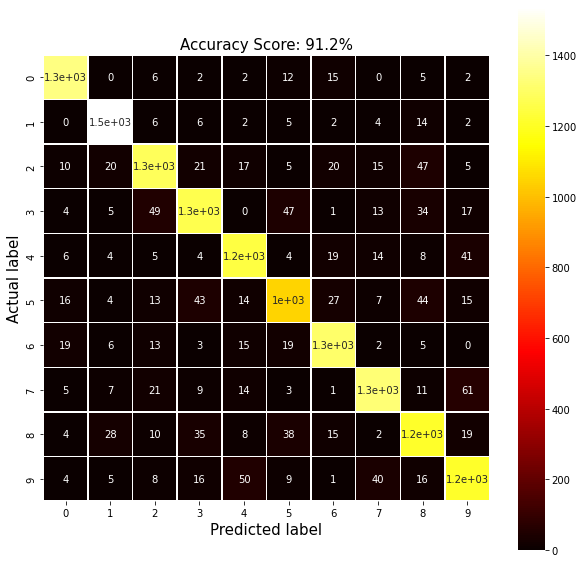

In [77]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'hot');
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
plt.title(f'Accuracy Score: {np.round(100*score,1)}%', size = 15)
plt.show()